# Timeseries analysis of temperature in Cairo

* **Products used:** 
[ERA5](https://registry.opendata.aws/ecmwf-era5/)

This dataset is external to the Digital Earth Africa platform.

## Background

Timeseries decomposition can help us visualise long-term trends in geospatial variables. The technique decomposes a timeseries into its cyclical, trend, and residual error components. 

## Description
For this example, we will load air temperature data for Cairo, Egypt, then calculate the spatial average to generate a one-dimensional timeseries.

The notebook outlines:

1. Loading ERA5 temperature data.
2. Decomposing a timeseries.
3. Plotting and interpreting seasonal and trend components of timeseries.

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

**Important note:** Scipy has updated and has some incompatibilities with old versions of statsmodels. If the loading packages cell below returns an error, try running `pip install statsmodels` or `pip install statsmodels --upgrade` in a code cell, then load the packages again.

### Load packages


In [1]:
%matplotlib inline

import datacube
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from deafrica_tools.plotting import display_map
from deafrica_tools.load_era5 import load_era5
from statsmodels.tsa.seasonal import seasonal_decompose

### Analysis parameters

We will load temperature data for a forty year period (1981-2021) for the city of Cairo, Egypt.

The following cell sets important parameters for the analysis:

* `lat`: range of latitude we wish to cover.
* `lon`: range of longitude we wish to cover.
* `time`: time period

**If running the notebook for the first time**, keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.


In [2]:
# Area around Cairo
lat = (29.66, 30.32)
lon = (30.70, 31.46)

# Define the time window
time = '1981-01', '2021-12'

display_map(x = lon, y= lat)

## Load temperature data

We will use the `load_era5` function to get air temperature at a height of 2m for the period and area of interest. We resample this dataset to monthly mean values as we load, so the dataset size is more manageable.

In [3]:
var = 'air_temperature_at_2_metres'

temp = load_era5(var, lat, lon, time, reduce_func=np.mean, resample='1M').compute()

We then need to convert the temperature from its native unit, Kelvin, to celsius.

In [4]:
attrs = temp[var].attrs
attrs['units']='C'
temp = temp - 273.15
temp[var].attrs = attrs

Below, the observed timeseries is plotted. Are there any noticeable trends or anomalies?

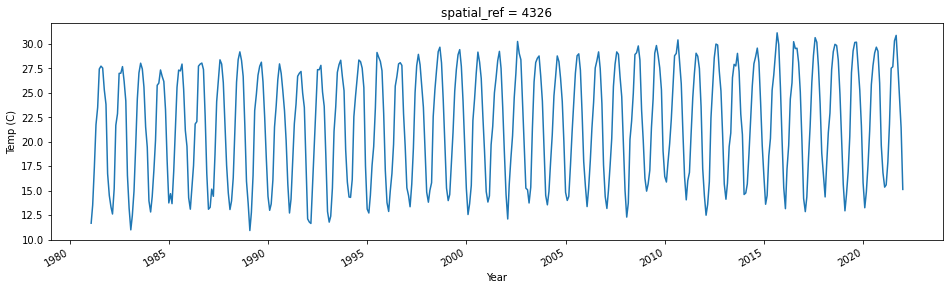

In [5]:
temp[var].mean(['lat','lon']).plot(figsize = (16,4));
plt.xlabel('Year');
plt.ylabel('%s (%s)'%('Temp', temp[var].attrs['units']));

## Timeseries decomposition

The next step is to decompose the observed timeseries into its seasonal and trend components. The `seasonal_decompose` function works best on pandas timeseries, so we will spatially aggregate our timeseries and convert it to a pandas dataframe.

In [6]:
temp_ts = temp[var].mean(['lat','lon']).to_pandas()

Now we can use the `seasonal_decompose` function on our timeseries. Details on the function are available in the [package notes](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) and general timeseries decomposition is available [here](https://en.wikipedia.org/wiki/Decomposition_of_time_series).

The result of decomposition is plotted below which shows the observed timeseries (shown above), the trend component (note difference in y-axis scale), the seasonal (or cyclical) component, and the residual error.

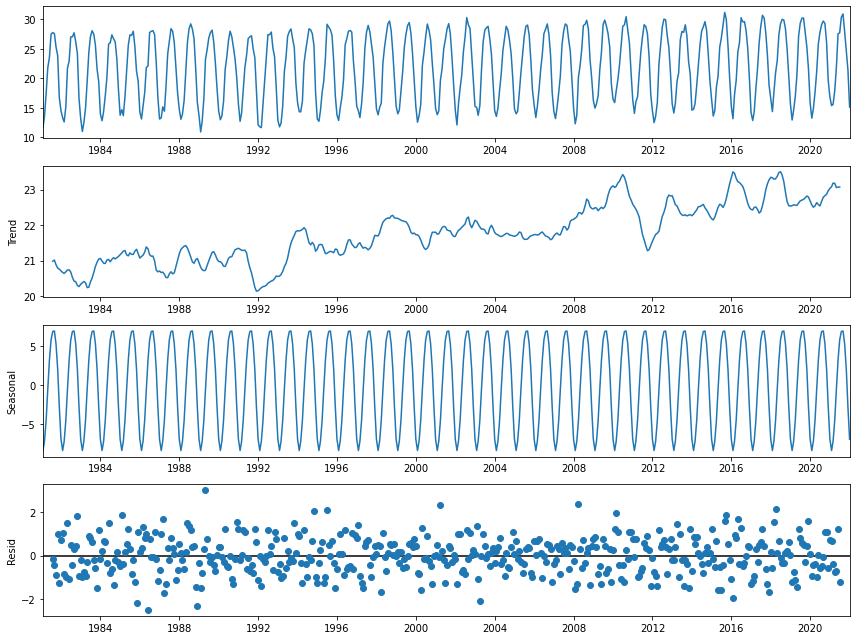

In [7]:
temp_dts = seasonal_decompose(temp_ts)

fig = temp_dts.plot()
fig.set_size_inches((12, 9))
fig.tight_layout()
plt.show();

We can also plot individual components, such as the long term trend, as below. We can see a generally increasing trend from between 20 and 21 degreees, to between 22 and 23 degrees.

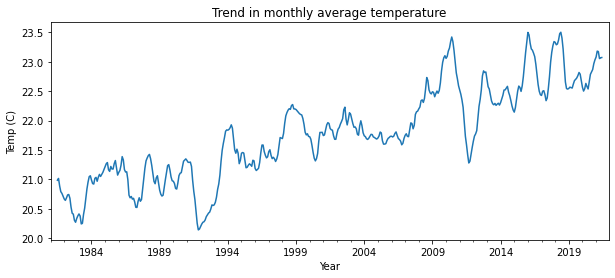

In [8]:
temp_dts.trend.plot(figsize = (10,4))
plt.xlabel('Year')
plt.ylabel('%s (%s)'%('Temp', temp[var].attrs['units']))
plt.title('Trend in monthly average temperature');

## Interpretation and next steps

The exploratory analysis conducted in this notebook allows us to visually examine trends and seasonal patterns. We would need to conduct further statistical test to determine whether any observed trends could be considered 'significant'. 

We are also unable to draw any causal inferences about observed trends from this analysis alone. We might hypothesise that the increasing temperature trend is due to increasing atmospheric greenhouse gas concentration, land surface and land use change at Cairo, prevailing climate influences, or some combination of the above. Further analysis would be required to attribute the trends to any of these factors. 

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [9]:
print(datacube.__version__)

1.8.6


**Last Tested:**

In [10]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2022-04-27'